# Project - Campaign for selling personal loans.

### This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

### The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

### The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [13]:
## Question 1
# Read the column description and ensure you understand each attribute well

In [14]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
data.shape

(5000, 14)

In [15]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [16]:
# Question 2
# Study the data distribution in each attribute, share your findings. (5 points)

In [17]:
bank_data=data.drop(['ID', 'Experience', 'ZIP Code'], axis=1)

In [18]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


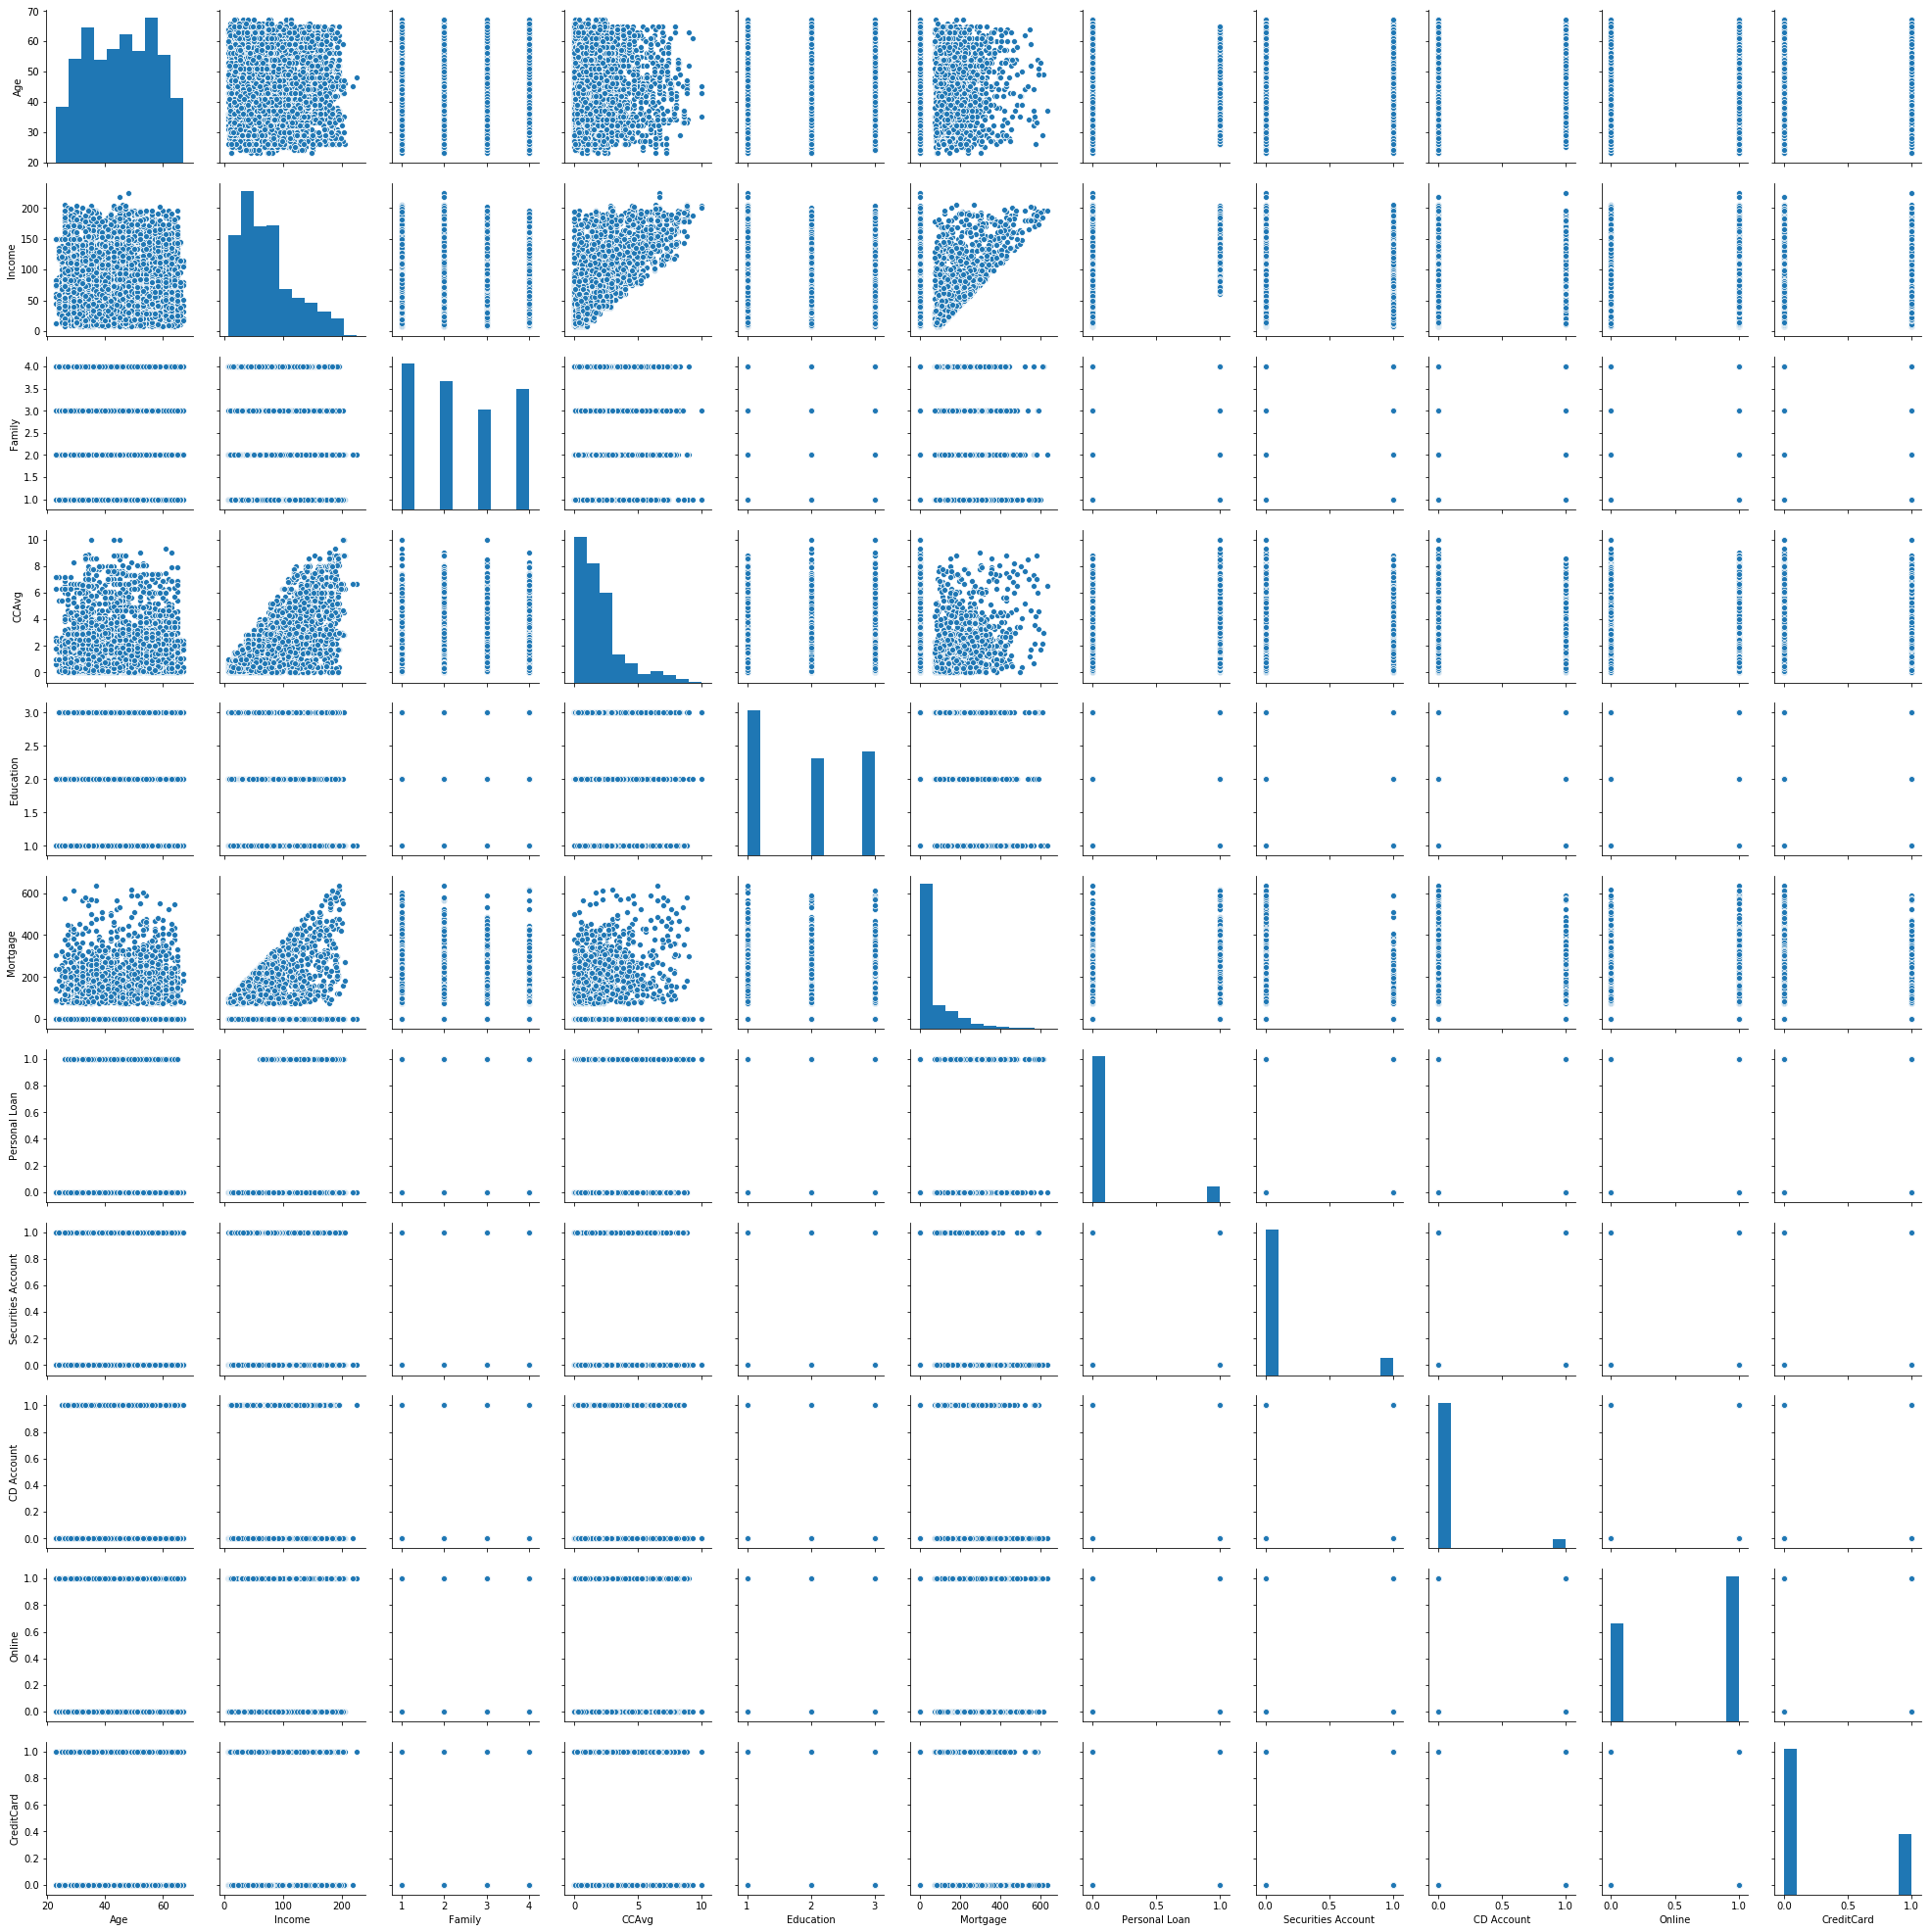

In [19]:
import seaborn as sns
sns.pairplot(bank_data)

In [87]:
bank_data_corr = bank_data.corr()

bank_data_corr

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


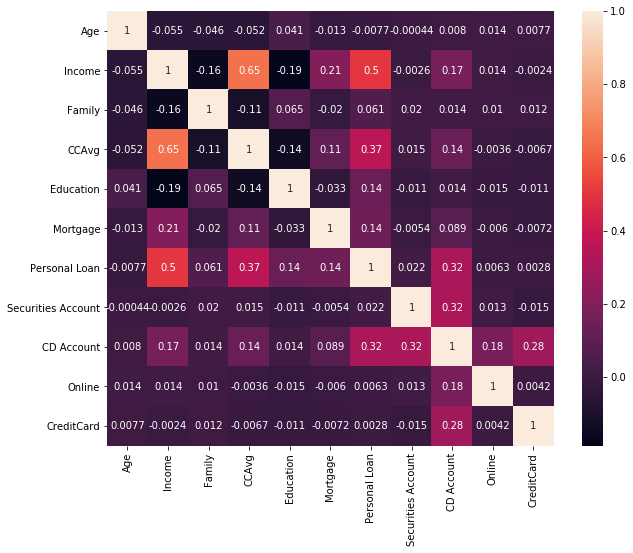

In [88]:
plt.figure(figsize=(10, 8))

sns.heatmap(bank_data_corr, annot=True)

In [21]:
X = bank_data.drop('Personal Loan', axis=1)
Y = bank_data['Personal Loan']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [23]:
x_train.shape, y_train.shape

((3500, 10), (3500,))

In [24]:
x_test.shape, y_test.shape

((1500, 10), (1500,))

In [25]:
##LOGISTIC REGRESSION

In [27]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
log_clf = LogisticRegression(C=1, solver='liblinear')

svc_clf = SVC(C=1, kernel='linear', gamma='auto')

naive_clf = GaussianNB()

In [29]:
for clf in (log_clf, svc_clf, naive_clf):
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9613333333333334
SVC 0.9626666666666667
GaussianNB 0.8933333333333333


In [82]:
## Confusion Matrix for Logistic Regression

In [83]:
print(confusion_matrix(y_test, y_pred))

TypeError: 'numpy.ndarray' object is not callable

In [42]:
#KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred = classifier.predict(x_test)  

In [47]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
type(y_test)

pandas.core.series.Series

In [49]:
y_pred1=pd.DataFrame(y_pred)

In [50]:
type(y_pred1)

pandas.core.frame.DataFrame

In [51]:
df_c = pd.concat([y_pred1.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [52]:
df_c

,0,Personal Loan
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


In [71]:
## Confusion Matrix for KNN

In [53]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1326   52]
 [  74   48]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1378
           1       0.48      0.39      0.43       122

    accuracy                           0.92      1500
   macro avg       0.71      0.68      0.69      1500
weighted avg       0.91      0.92      0.91      1500



In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.916

In [56]:
### Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(x_train, y_train)

In [61]:
y_pred_GNB=clf_GNB.predict(x_test)

In [63]:
y_pred_GNB

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

0.8933333333333333

In [69]:
## Confusion Matrix for Naive Bayes

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[1271  107]
 [  53   69]]


In [84]:
#  7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [86]:
# Per confusion matrix and accuracy it seems like KNN is the best method for this model.